## Hello World!!!

In [1]:
print("Hello World!!!")

Hello World!!!


## 変数

In [12]:
a = 100
b = 40.5
c = "a"

# aを出力
print(a)

# 文字列とくっつける
print(f"aは{a}，bは{b}です")

# 割り算をやってみよう
print(a/b)

# 型を調べる
print(type(a))
print(type(b))
print(type(c))

100
aは100，bは40.5です
2.4691358024691357
<class 'int'>
<class 'float'>
<class 'str'>


## 配列

In [13]:
# 普通の配列
a = [1,2,3,4,5,6]
print(f"aは {a}")
print(f"1番目の要素は {a[1]}")

# 二次元配列
b = [[1,2,3],[4,5,6]]
print(b)

# 足し算（引き算，掛け算，割り算はない）
print(a + b)

# 連想配列
x_data = {"a":123, "b":345}
print(x_data["a"])

aは [1, 2, 3, 4, 5, 6]
1番目の要素は 2
[[1, 2, 3], [4, 5, 6]]
[1, 2, 3, 4, 5, 6, [1, 2, 3], [4, 5, 6]]
123


## if文

In [14]:
x_data = int(input("入力してください"))

# if文による分岐
if(x_data == 1):
    print("Hello World!!!")
elif(x_data == 2):
    print("こんにちは！！！")
else:
    print("さようなら")

Hello World!!!


## while文

In [3]:
stop = False

while(not stop) :
    x_data = input("やめますか？")
    if(x_data == "a"):
        stop = True

## for文

In [6]:
a = [3,1,4,5,2]
# 初期値
sum = 0
# aの要素すべてをsumに足し続ける
for i in a:
    sum += i
print(sum)

sum = 0
for i in range(10):
    sum += i
print(sum)



15
45


## 関数

In [9]:
def is_even_number(n):
    x = n % 2
    if(x == 0):
        return True
    return False

print(is_even_number(2))
print(is_even_number(10))
print(is_even_number(5))

True
True
False


## ちょっと便利な関数（lambda式）

In [13]:
# 1行で書ける程度の小さい関数はこういう書き方も出来る
f = lambda x: x**2
g = lambda x, y: x**2*y + y**2*x

print(f(2))
print(f(100))
print(g(1, 2))

4
10000
6


## 関数の基本:最小二乗法の式をつくろう

In [29]:
# ここに書く

# x, yはnumpyの配列
def lsm(x_data, y_data):
    # xの和
    x_sum = 0
    for i in range(len(x_data)):
        x_sum += x_data[i]
    # yの和
    y_sum = 0
    for i in range(len(y_data)):
        y_sum += y_data[i]
    # x^2の和
    xx_sum = 0
    for i in range(len(x_data)):
        xx_sum += x_data[i]**2
    # y^2の和
    yy_sum = 0
    for i in range(len(y_data)):
        yy_sum += y_data[i]**2
    # xyの和
    xy_sum = 0
    for i in range(len(x_data)):
        xy_sum += x_data[i]*y_data[i]
    # nを求める
    n = len(x_data)
    d = n * xx_sum - (x_sum)**2
    d1 = y_sum*xx_sum - x_sum*xy_sum
    d2 = n*xy_sum - x_sum*y_sum
    # ラムダ式で「式を」返す
    f = lambda x: d1/d + d2/d*x
    print(f"({d1/d}) + ({d2/d})x")
    return f

# debug
x_list = [1,2,3,4,5,6]
y_list = [15,26,16,25,45,55]
f = lsm(x_list, y_list)
print(f(2))


(3.7333333333333334) + (7.6)x
18.933333333333334


## pandasを使ってみよう

,時刻,温度
0,1,12
1,2,25
2,3,30
3,4,38
4,5,45
5,6,60


<Axes: xlabel='時刻'>

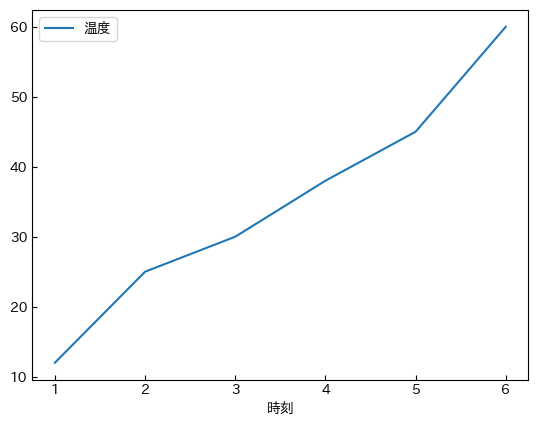

In [50]:
import pandas as pd

df = pd.read_csv("data.csv")

display(df)

df.plot(x='時刻', y='温度')

## グラフ作成関数を作成する

In [58]:
import matplotlib.pyplot as plt
# 日本語を扱うのに必要
import japanize_matplotlib
import numpy as np
import pandas as pd
from tikzplotlib import save as tikz_save

# アス比を決める関数（触らない）
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)


def make_plot(x_data, y_data):
    # 目盛を内向きに
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data,c="black")


    # ここに最小二乗法の式を貼りたい
    #x_data = np.linspace(1, 6)
    #y_data = np.linspace(1, 60)
    f = lsm(x_data, y_data)
    # グラフを端から端まで表示したいので，新しく作る
    lim_list = ax.get_xlim()
    # 軸を固定
    ax.set_xlim(lim_list[0],lim_list[1])
    # 軸から少しはみ出すようにx座標を設定
    x_data = np.linspace(lim_list[0]-1, lim_list[1]+1)
    # 直線をプロット
    ax.plot(x_data, [f(x_data[k]) for k in range(len(x_data))],c="black")
    
    # アス比を決める
    adjustFigAspect(fig)

    # 補助目盛の追加
    ax.minorticks_on()
    
    # ラベルの設定
    ax.set_xlabel(r"時刻$t/\mathrm{s}$")
    ax.set_ylabel(r"温度$T/\mathrm{C}^{\circ}$")

    # 目盛を手動で決める（最小値，最大値，間隔）
    #ax.set_xticks( np.arange(0, 10, 1))
    #ax.set_yticks( np.arange(0, 65, 10))

    # すべての方向に目盛を
    ax.tick_params(bottom=True, top=True, left=True, right=True)
    ax.tick_params(which="minor", bottom=True, top=True, left=True, right=True)

    # 対数目盛にする
    # plt.xscale("log")
    # plt.yscale("log")

    # 色の設定
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['top'].set_color("black")
    plt.gca().spines['right'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    
    tikz_save('hoge.tex', strict=True)


## 実行してみよう

(4.2) + (8.8)x


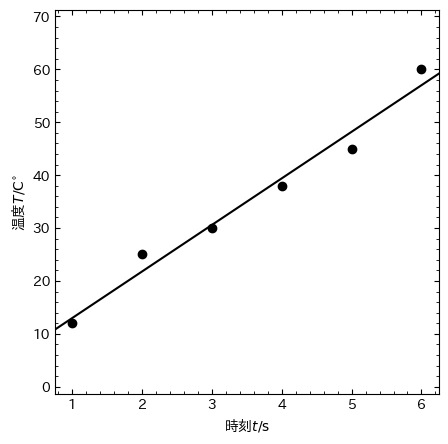

In [59]:
# データ
# x = np.linspace(1, 1000)
# y = np.log10(x)
df = pd.read_csv("data.csv")
x_data = df['時刻'].to_numpy()
y_data = df['温度'].to_numpy()
make_plot(x_data, y_data)